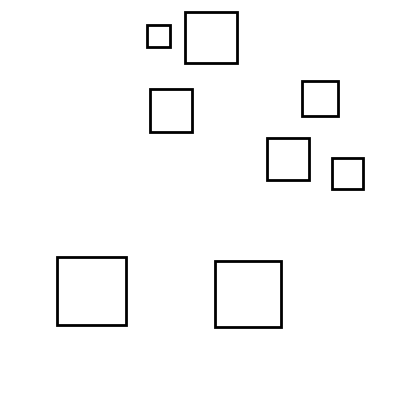

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random


def create_random_non_touching_squares(
    N, min_size=0.05, max_size=0.2, border_thickness=0.02
):
    # Create a new figure
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    # List to store the positions and sizes of squares
    squares = []

    # Generate squares
    for _ in range(N):
        while True:
            # Generate random size between min_size and max_size
            size = random.uniform(min_size, max_size)
            # Generate random position ensuring the square stays within the plot
            x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
            current_square = (x, y, size)

            # Check if the new square overlaps with any existing square's borders
            overlap = False
            for px, py, psize in squares:
                if not (
                    x + size + border_thickness < px
                    or x > px + psize + border_thickness
                    or y + size + border_thickness < py
                    or y > py + psize + border_thickness
                ):
                    overlap = True
                    break
            if not overlap:
                squares.append(current_square)
                break

        # Create and add the square patch
        square = patches.Rectangle(
            (x, y),
            size,
            size,
            linewidth=2,
            edgecolor="black",
            facecolor="none",
        )
        ax.add_patch(square)

    # Set the limits of the plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Remove the axis border
    ax.axis("off")

    # Display the plot
    plt.show()


# Example usage with N squares
create_random_non_touching_squares(8)

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import os
import json


def create_random_non_touching_squares(
    N,
    repetitions=10,
    min_size=0.05,
    max_size=0.2,
    border_thickness=0.02,
    save_path="images",
):
    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # Data dictionary to store image details
    data = []

    # Generate and save N images for each number of squares
    for num_squares in range(1, N + 1):
        for rep in range(repetitions):
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            squares = []

            for _ in range(num_squares):
                while True:
                    size = random.uniform(min_size, max_size)
                    x, y = random.uniform(0, 1 - size), random.uniform(0, 1 - size)
                    current_square = (x, y, size)

                    overlap = False
                    for px, py, psize in squares:
                        if not (
                            x + size + border_thickness < px
                            or x > px + psize + border_thickness
                            or y + size + border_thickness < py
                            or y > py + psize + border_thickness
                        ):
                            overlap = True
                            break
                    if not overlap:
                        squares.append(current_square)
                        break

                square = patches.Rectangle(
                    (x, y), size, size, linewidth=2, edgecolor="black", facecolor="none"
                )
                ax.add_patch(square)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis("off")

            # Save the figure
            image_name = f"square_{num_squares}_{rep+1}.png"
            plt.savefig(os.path.join(save_path, image_name))
            plt.close(fig)

            # Store details in the data dictionary
            data.append(
                {
                    "image_name": image_name,
                    "number_of_squares": num_squares,
                    "squares": [
                        {"x": x, "y": y, "size": size} for x, y, size in squares
                    ],
                }
            )

    # Save data to a JSON file
    with open(os.path.join(save_path, "data.json"), "w") as f:
        json.dump(data, f, indent=4)


# Example usage: generate 100 images with 10 images for each 1 to 10 squares
create_random_non_touching_squares(10)

# Nested Squares

